In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# Part 1: Linear layer

1.1) Let's consider a linear regression problem with 100 samples described by the formula  $y = a*x+b + noise$

In [2]:
n = 100
a = -2
b = 3

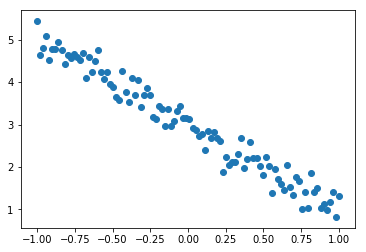

In [3]:
x = np.linspace(-1, 1, n)
y = a * x + b + np.random.normal(scale=0.25, size=n)

plt.scatter(x, y)

1.2) The task is to find the parameters $a$ and $b$. Write a function which calculates loss of the model as a mean square error $ \frac{(y-\widehat{y})^2}{n}$ where $y$ is target, $\widehat{y}$ is output of the model.

In [ ]:
def mse(y_target, y_calc):
    

In [ ]:
a_2 = 1.1
b_2 = 2

In [ ]:
y_calc = a_2 * x + b_2
mse(y, y_calc)

In [ ]:
plt.scatter(x, y, label="target")
plt.scatter(x, y_calc, label="calculated")
plt.legend()

1.3) Write a function which calculates gradient of loss function, (y_target, and y_calc are tensor not one value).

In [ ]:
def mse_grad(y_target, y_calc):
    

1.4) Fill the update function to calculate gradient of parameter $a$ and $b$ basing on a gradient of loss function (grad_y) and input vector (x).
Then update the parameter $a$ and $b$ base on their gradients and learning rate (lr).

In [ ]:
class LinearLayer:
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __call__(self, x):
        return self.a * x + self.b

    def update(self, x, grad_y, lr):
        #TODO

1.5) Write Step function which calculates: y_calc output of the model base on input x, loss of the model, gradient of loss, and update the model parameters.

In [ ]:
def Step(x, y, model, lr):
    #TODO
    return y_calc, loss

1.6) Fit the model for 100 epochs, with learning rate 0.05, and with initial value of parameters a = 1.1, and b = 2.

In [ ]:
model = LinearLayer(1.1, 2)

In [ ]:
lr = 0.05

In [ ]:
epoch = 100
losses = []
for i in range(epoch):
    y_calc, loss = Step(x, y, model, lr)
    losses.append(loss)

In [ ]:
plt.plot(losses)

Animation of the learning process

In [ ]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [ ]:
model = LinearLayer(1.1, 2)
fig = plt.figure()
plt.scatter(x, y)
line, = plt.plot(x, y_calc, ".", c="orange")
plt.close()


def animate(i):
    y_calc, loss = Step(x, y, model, lr)
    line.set_ydata(y_calc)
    return (line,)


animation.FuncAnimation(fig, animate, np.arange(0, epoch), interval=20)

1.7) There is an example it can be done in pytorch.

In [ ]:
# Imports
import torch
import torch.nn as nn

In [ ]:
# Convert numpy array to torch tensor, [:,None] add an additional dimension
xt = torch.FloatTensor(x[:, None])
yt = torch.FloatTensor(y[:, None])

In [ ]:
def mse(y_target, y_calc):
    return ((y_target - y_calc) ** 2).mean()

In [ ]:
class LinearLayer(nn.Module):
    def __init__(self, a, b):
        super(LinearLayer, self).__init__()  # initialize torch functionality
        # change a and b to float tensor, and next to parameters,
        # the main difference between tensor and parameter is that parameter keeps information about calculations,
        # which is used to calculate gradients
        self.a = nn.Parameter(torch.FloatTensor([a]).view(1, 1))
        self.b = nn.Parameter(torch.FloatTensor([b]))

    # forward function is similar to python __call__ but also contain torch functionality
    def forward(self, x):
        return  x @ self.a + self.b  # linear equation, @ means matrix multiplication for tensor

    def update(self, lr):
        with torch.no_grad():  # when we update parameter, we have to switch off gradient tracking
            self.a.sub_(lr * self.a.grad)  # inplace update of parameter a
            self.a.grad.zero_()  # clear gradient

            self.b.sub_(lr * self.b.grad)
            self.b.grad.zero_()

In [ ]:
model =  LinearLayer(-1.1, 0.2)

In [ ]:
def torchStep(x, y, model, lr):
    y_calc = model(x)  # calculate the output of our model
    loss = mse(y, y_calc)  # calculate the loss
    loss.backward()  # calculate all gradients
    model.update(lr)  # update parameters
    return loss, y_calc

In [ ]:
loss, y_calc = torchStep(xt, yt, model, lr)
y_calc = y_calc.detach().cpu()
fig = plt.figure()
plt.scatter(xt[:, 0], yt)
line, = plt.plot(xt[:, 0], y_calc, c="orange")
plt.close()


def animate(i):
    loss, y_calc = torchStep(xt, yt, model, lr)
    y_calc = y_calc.detach().cpu()  #
    line.set_ydata(y_calc)
    return (line,)


animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In [ ]:
# we can use optymalizer to update parameters base on their gradients
# the most simple is stochastic gradient descent (SGD)
def torchStep2(x, y, model, optim):
    optim.zero_grad()  # clear gradients
    y_calc = model(x)  # calculate output of model
    loss = mse(y, y_calc)  # calculate loss
    loss.backward()  # calculate all gradients
    optim.step()  # make a optymalizer step which update parameters
    return loss, y_calc

In [ ]:
model = LinearLayer(-1.1, 0.2)
optim = torch.optim.SGD(model.parameters(), lr)

In [ ]:
loss, y_calc = torchStep2(xt, yt, model, optim)
y_calc = y_calc.detach().cpu()
fig = plt.figure()
plt.scatter(xt[:, 0], yt)
line, = plt.plot(xt[:, 0], y_calc, c="orange")
plt.close()


def animate(i):
    loss, y_calc = torchStep2(xt, yt, model, optim)
    y_calc = y_calc.detach().cpu()
    line.set_ydata(y_calc)
    return (line,)


animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

# Part 2: Convolution layer

In [ ]:
# input image
image = np.array(
    [
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    ]
)

In [ ]:
plt.imshow(image)

2.1) Write a function which calculates a convolution on an input matrix (image) using kernel (mask) with shape 3x3 and bias. Do not use padding, so the output image should be in size: (input_wight -2) x (input_height -2).

In [ ]:
def Convolution(image, kernel, bias):
    img_out = np.zeros((image.shape[0] - 2, image.shape[1] - 2))
    #TODO
    return img_out

In [ ]:
# kernel (mask) which is mean filter
kernel = np.ones((3, 3)) / 9
kernel

In [ ]:
bias = -0.5

In [ ]:
img_out = Convolution(image, kernel, bias)

In [ ]:
plt.imshow(img_out)

2.2) Find out kernels (masks) which found horizontal and vertical lines.

In [ ]:
kernel_horizontal =

In [ ]:
img_horizontal = Convolution(image, kernel_horizontal, 0)
plt.imshow(img_horizontal)

In [ ]:
kernel_vertical = 

In [ ]:
img_vertical = Convolution(image, kernel_vertical, 0)
plt.imshow(img_vertical)

2.3) Complete function to calculate ReLU.

In [ ]:
def relu(x):
    

2.4) Find bias values such that output images pixels have a value above 0 only if original pixel is a part of the horizontal/vertical line.

In [ ]:
plt.imshow(relu(img_horizontal))
plt.show()
plt.imshow(relu(img_vertical))

# Part 3: Deep network

In [ ]:
import pandas as pd

In [ ]:
# load iris dataset
df = pd.read_csv('data/iris.csv')

In [ ]:
# n - number of elements in dataset
n = len(df)

In [ ]:
# useful variables
feature_columns = ["sepal.length", "sepal.width", "petal.length", "petal.width"]
target_column = "variety"
class_number = 3
feature_number = 4

In [ ]:
# dictionaries use to map class name to number
name_to_class = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
class_to_name = {"Setosa": 0, "Versicolor": 1, "Virginica": 2}

In [ ]:
# conversion of class name
df[target_column] = df[target_column].apply(lambda x: class_to_name[x])

In [ ]:
# take raw numpy data
x = df[feature_columns].values
y = df[target_column].values

In [ ]:
# normalize data to make network input mean value equals 0 and standard deviation 1
x = (x - x.mean(0)) / x.std(0)
print(x.mean(0))
print(x.std(0))

In [ ]:
# conversion numpy array to torch tensor
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [ ]:
# simple neural network with one hidden layer with hidden_nr neuron
# input_layer calculate some features  which are used by hidden_layer to calculate prediction
# between input_layer and hidden_layer there is relu  as a nonlinear activation function
# after hidden_layer there is sigmoid function because we want the network to return the result as a probability of each class in range [0,1]
class Net(nn.Module):
    def __init__(self, input_nr, hidden_nr, output_nr):
        super(Net, self).__init__()
        self.input_layer = nn.Linear(input_nr, hidden_nr)
        self.hidden_layer = nn.Linear(hidden_nr, output_nr)

    def forward(self, x):
        x = self.input_layer(x)
        x = torch.relu(x)
        x = self.hidden_layer(x)
        return torch.sigmoid(x)

Cross entropy loss is equal $- (y=0) * log(p_0) - (y=1) * log(p_1)  - (y=2) * log(p_2)$ where $p_1, p_2,p_3$ are calculated probability of class 1,2,3; and y=0 means y is classified to class 0.

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
# accuracy means how many samples are classified correctly
def Accuracy(y_target, y_calc):
    prediction_class = y_calc.max(1)[1]
    number_of_correct = (prediction_class == y).float().sum()
    return number_of_correct / n

In [ ]:
def Step(x, y, model, optim):
    optim.zero_grad()
    y_calc = model(x)
    loss = loss_func(y_calc, y)
    loss.backward()
    optim.step()
    acc = Accuracy(y, y_calc)
    return loss, y_calc, acc

In [ ]:
# Train function train model for epoch step, and collect metrics (loss and accuracy)
def Train(x, y, model, optim, epoch):
    losses = []
    accuracies = []
    for i in range(epoch):
        loss, y_calc, acc = Step(x, y, model, optim)
        losses.append(loss)
        accuracies.append(acc)
    return losses, accuracies

In [ ]:
lr = 0.1

In [ ]:
# create a model and optimalizer
hidden_nr = 5
model = Net(feature_number, hidden_nr, class_number)
optim = torch.optim.SGD(model.parameters(), lr)

In [ ]:
epoch = 200
losses, accuracies = Train(x, y, model, optim, epoch)

In [ ]:
plt.plot(losses)
plt.show()
plt.plot(accuracies)

## Task for 5:
Choose one of the following:

3.1) Create a report of testing different values of learning rate, and number of neurons in hidden layer; Run every test 10 times with 200 epochs. Make a plot of mean of losses and accuracy of each value in the test case. Make a table of score after 200 epochs of learning which should contain best, worst, mean and standard deviation of loss and accuracy (you can use pandas describe function).  

    test case 1: 
    learning rate:[ 1, 0.5, 0.1, 0.01, 0.001]
    number of neuron in hidden layer: 10
    
    test case 2: 
    number of neuron in hidden layer: [1, 2, 5, 10, 20, 100]
    learning rate: 0.1
    
    

3.2) If you have a GPU, you can try to make an image classifier shown inhttps://course.fast.ai/videos/?lesson=2
You should watch all video, but after 16.30 there are creating your own dataset and next create an image classifier.
You can use animals dataset or prepare your own dataset, but it should contain at least 4 different classes.

    To finish this task you should prepare a report by creating a classifier, and show working neural network at the laboratory.
    The report should contain:
        - describe of dataset: number of samples, some examples, how it was prepared, number of samples in train and validation set, are there images which contains more than one class, batch size
        - describe of model: tested models
        - describe of training: how testing looks like, how many epoch, how long it takes, data cleaning, learning rate finder and so on, plots of losses, and accuracy
        - describe of result: confusion matrix, examples of correct classified image, examples of incorrect classified image
        